In [1]:
import pandas as pd
import sys
import numpy as np

In [2]:
from pathlib import Path
import os
# Get the current working directory (where the notebook is)
notebook_dir = Path.cwd()

# Move up to the root directory (parent of 'notebooks')
project_root = notebook_dir.parent.parent
# project_root = notebook_dir

os.chdir(project_root)


In [3]:
from analysis.unsupervised import *
from analysis.supervised import *
from analysis.causal import *

In [23]:
model_name = ["gemma-7b-it", "Llama-3.1-8B-Instruct", "Llama-3.2-3B-Instruct", "Ministral-8B-Instruct"][3]

request_type = ["harmful", "harmless", "haize"][0]

single = ["single", "multilayer"][0]
publication = ["public1","public_2"][1]
# df = pd.read_csv(f"/data/nathalie_maria_kirch/ERA_Fellowship/datasets/{model_name}/causal_intervention_parameters_with_capability_aggregated.csv")

df = pd.read_csv(f"/data/nathalie_maria_kirch/ERA_Fellowship/datasets/{publication}/{model_name}/intervention/causal_intervention_parameters_with_capability_{single}.csv")
# make new column that merges strings in "probe_type" and offensive defensive columns
df["probe_type_offensive_defensive"] = df["probe_type"] + "_" + df["offensive_defensive"]



FileNotFoundError: [Errno 2] No such file or directory: '/data/nathalie_maria_kirch/ERA_Fellowship/datasets/public_2/Ministral-8B-Instruct/intervention/causal_intervention_parameters_with_capability_single.csv'

In [5]:
df

,asr,model,probe_type,offensive_defensive,c_strength,lr,capability,probe_path,capability_stderr,target_value,is_best_config,probe_type_offensive_defensive
0,45,Ministral-8B-Instruct,control,NaN,NaN,NaN,0.638940,NaN,0.003831,0.63894,True,NaN
1,27,Ministral-8B-Instruct,linear,defensive,-0.25,NaN,NaN,/data/nathalie_maria_kirch/ERA_Fellowship/data...,NaN,NaN,False,linear_defensive
2,25,Ministral-8B-Instruct,linear,defensive,-0.40,NaN,NaN,/data/nathalie_maria_kirch/ERA_Fellowship/data...,NaN,NaN,False,linear_defensive
3,25,Ministral-8B-Instruct,linear,defensive,-0.50,NaN,NaN,/data/nathalie_maria_kirch/ERA_Fellowship/data...,NaN,NaN,False,linear_defensive
4,1,Ministral-8B-Instruct,linear,defensive,-1.00,NaN,NaN,/data/nathalie_maria_kirch/ERA_Fellowship/data...,NaN,NaN,False,linear_defensive
...,...,...,...,...,...,...,...,...,...,...,...,...
63,27,Ministral-8B-Instruct,transformer,defensive,10.00,0.1,NaN,/data/nathalie_maria_kirch/ERA_Fellowship/data...,NaN,NaN,NaN,transformer_defensive
64,1,Ministral-8B-Instruct,linear,defensive,-1.00,NaN,0.435907,/data/nathalie_maria_kirch/ERA_Fellowship/data...,0.004030,0.63894,False,linear_defensive
65,25,Ministral-8B-Instruct,linear,defensive,-0.40,NaN,0.632673,/data/nathalie_maria_kirch/ERA_Fellowship/data...,0.003824,0.63894,True,linear_defensive
66,57,Ministral-8B-Instruct,linear,offensive,0.50,NaN,0.628044,/data/nathalie_maria_kirch/ERA_Fellowship/data...,0.003831,0.63894,False,linear_offensive


In [6]:
df = df[df["is_best_config"] == True]
if single== "single": 
        df = df[~df["probe_path"].str.contains("aggregated", na=True)]
elif single =="multilayer":
      df = df[df["probe_path"].str.contains("aggregated", na=True)]
# order rows according to asr
df = df.sort_values(by="asr", ascending=False)


In [7]:
df

,asr,model,probe_type,offensive_defensive,c_strength,lr,capability,probe_path,capability_stderr,target_value,is_best_config,probe_type_offensive_defensive
28,54,Ministral-8B-Instruct,mlp,offensive,15.0,0.025,0.639012,/data/nathalie_maria_kirch/ERA_Fellowship/data...,0.003830,0.63894,True,mlp_offensive
67,54,Ministral-8B-Instruct,linear,offensive,0.4,NaN,0.630537,/data/nathalie_maria_kirch/ERA_Fellowship/data...,0.003831,0.63894,True,linear_offensive
0,45,Ministral-8B-Instruct,control,NaN,NaN,NaN,0.638940,NaN,0.003831,0.63894,True,NaN
65,25,Ministral-8B-Instruct,linear,defensive,-0.4,NaN,0.632673,/data/nathalie_maria_kirch/ERA_Fellowship/data...,0.003824,0.63894,True,linear_defensive
61,16,Ministral-8B-Instruct,transformer,defensive,40.0,0.050,0.633813,/data/nathalie_maria_kirch/ERA_Fellowship/data...,0.003832,0.63894,True,transformer_defensive
19,1,Ministral-8B-Instruct,mlp,defensive,30.0,0.025,0.639225,/data/nathalie_maria_kirch/ERA_Fellowship/data...,0.003831,0.63894,True,mlp_defensive


In [8]:
# import pandas as pd

# def get_extreme_values_by_probe(df):
#     """
#     For each probe_type, get:
#     - Lowest value rows where offensive_defensive is "defensive"
#     - Highest value rows where offensive_defensive is "offensive"
    
#     Parameters:
#     df (pandas.DataFrame): Input DataFrame with columns:
#         - probe_type
#         - offensive_defensive
#         - c_strength
#         - other columns...
    
#     Returns:
#     pandas.DataFrame: Filtered DataFrame with two rows per probe_type
#     """
#     print(df["probe_type"].unique())
#     # Create separate dataframes for offensive and defensive
#     offensive_df = df[df['offensive_defensive'] == 'offensive'].copy()
#     defensive_df = df[df['offensive_defensive'] == 'defensive'].copy()
    
#     control = df[df['probe_type'] == 'control'].copy()

#     # Get highest values for offensive probes
#     offensive_max = offensive_df.sort_values('asr', ascending=False).groupby('probe_type', as_index=False).first()
    
#     # Get lowest values for defensive probes
#     defensive_min = defensive_df.sort_values('asr', ascending=True).groupby('probe_type', as_index=False).first()
    
    
#     # control = df[df['probe_type'] == 'control'].copy()
#     # Combine the results
#     result = pd.concat([offensive_max, defensive_min, control])
#     print(result["probe_type"].unique())
    
#     # Reset index to make probe_type a column again
#     result = result.reset_index()
#     print(result["probe_type"].unique())
    
#     # Sort by probe_type and offensive_defensive for clean output
#     result = result.sort_values(['probe_type', 'offensive_defensive'])
#     print(result["probe_type"].unique())
    
#     return result

# # Example usage:
# # Assuming your DataFrame is called 'df':
# df = get_extreme_values_by_probe(df)
# print(df["probe_type"].unique())


In [9]:
df

,asr,model,probe_type,offensive_defensive,c_strength,lr,capability,probe_path,capability_stderr,target_value,is_best_config,probe_type_offensive_defensive
28,54,Ministral-8B-Instruct,mlp,offensive,15.0,0.025,0.639012,/data/nathalie_maria_kirch/ERA_Fellowship/data...,0.003830,0.63894,True,mlp_offensive
67,54,Ministral-8B-Instruct,linear,offensive,0.4,NaN,0.630537,/data/nathalie_maria_kirch/ERA_Fellowship/data...,0.003831,0.63894,True,linear_offensive
0,45,Ministral-8B-Instruct,control,NaN,NaN,NaN,0.638940,NaN,0.003831,0.63894,True,NaN
65,25,Ministral-8B-Instruct,linear,defensive,-0.4,NaN,0.632673,/data/nathalie_maria_kirch/ERA_Fellowship/data...,0.003824,0.63894,True,linear_defensive
61,16,Ministral-8B-Instruct,transformer,defensive,40.0,0.050,0.633813,/data/nathalie_maria_kirch/ERA_Fellowship/data...,0.003832,0.63894,True,transformer_defensive
19,1,Ministral-8B-Instruct,mlp,defensive,30.0,0.025,0.639225,/data/nathalie_maria_kirch/ERA_Fellowship/data...,0.003831,0.63894,True,mlp_defensive


In [10]:
# color_dict = {
#     'mlp\noffensive': "#ff0000",    # Dark red
#     'linear\noffensive': "#ffcccb",  # Light red
#     'transformer\noffensive': "#8B0000",  # Medium-dark red
#     'no\nintervention\ncontrol': "#808080",  # Gray
#     'mlp\ndefensive': "#4169E1",    # Dark blue
#     'linear\ndefensive': "#ADD8E6",  # Light blue
#     'transformer\ndefensive': "#00008B"  # Medium blue
#}

# Update color dictionary to ensure consistent shading
color_dict = {
        'linear\noffensive': "#ffcccb",  # Lightest red
        'mlp\noffensive': "#ff0000",     # Medium red
        'transformer\noffensive': "#8B0000",  # Darkest red
        'no\nintervention\ncontrol': "#808080",  # Gray
        'linear\ndefensive': "#ADD8E6",  # Lightest blue
        'mlp\ndefensive': "#4169E1",     # Medium blue
        'transformer\ndefensive': "#00008B",
        "finetune\nnone": "#000000"
    }
    

['mlp\noffensive', 'linear\noffensive', 'control\nnan', 'linear\ndefensive', 'transformer\ndefensive', 'mlp\ndefensive']
['mlp\noffensive', 'linear\noffensive', 'no\nintervention\ncontrol', 'linear\ndefensive', 'transformer\ndefensive', 'mlp\ndefensive']


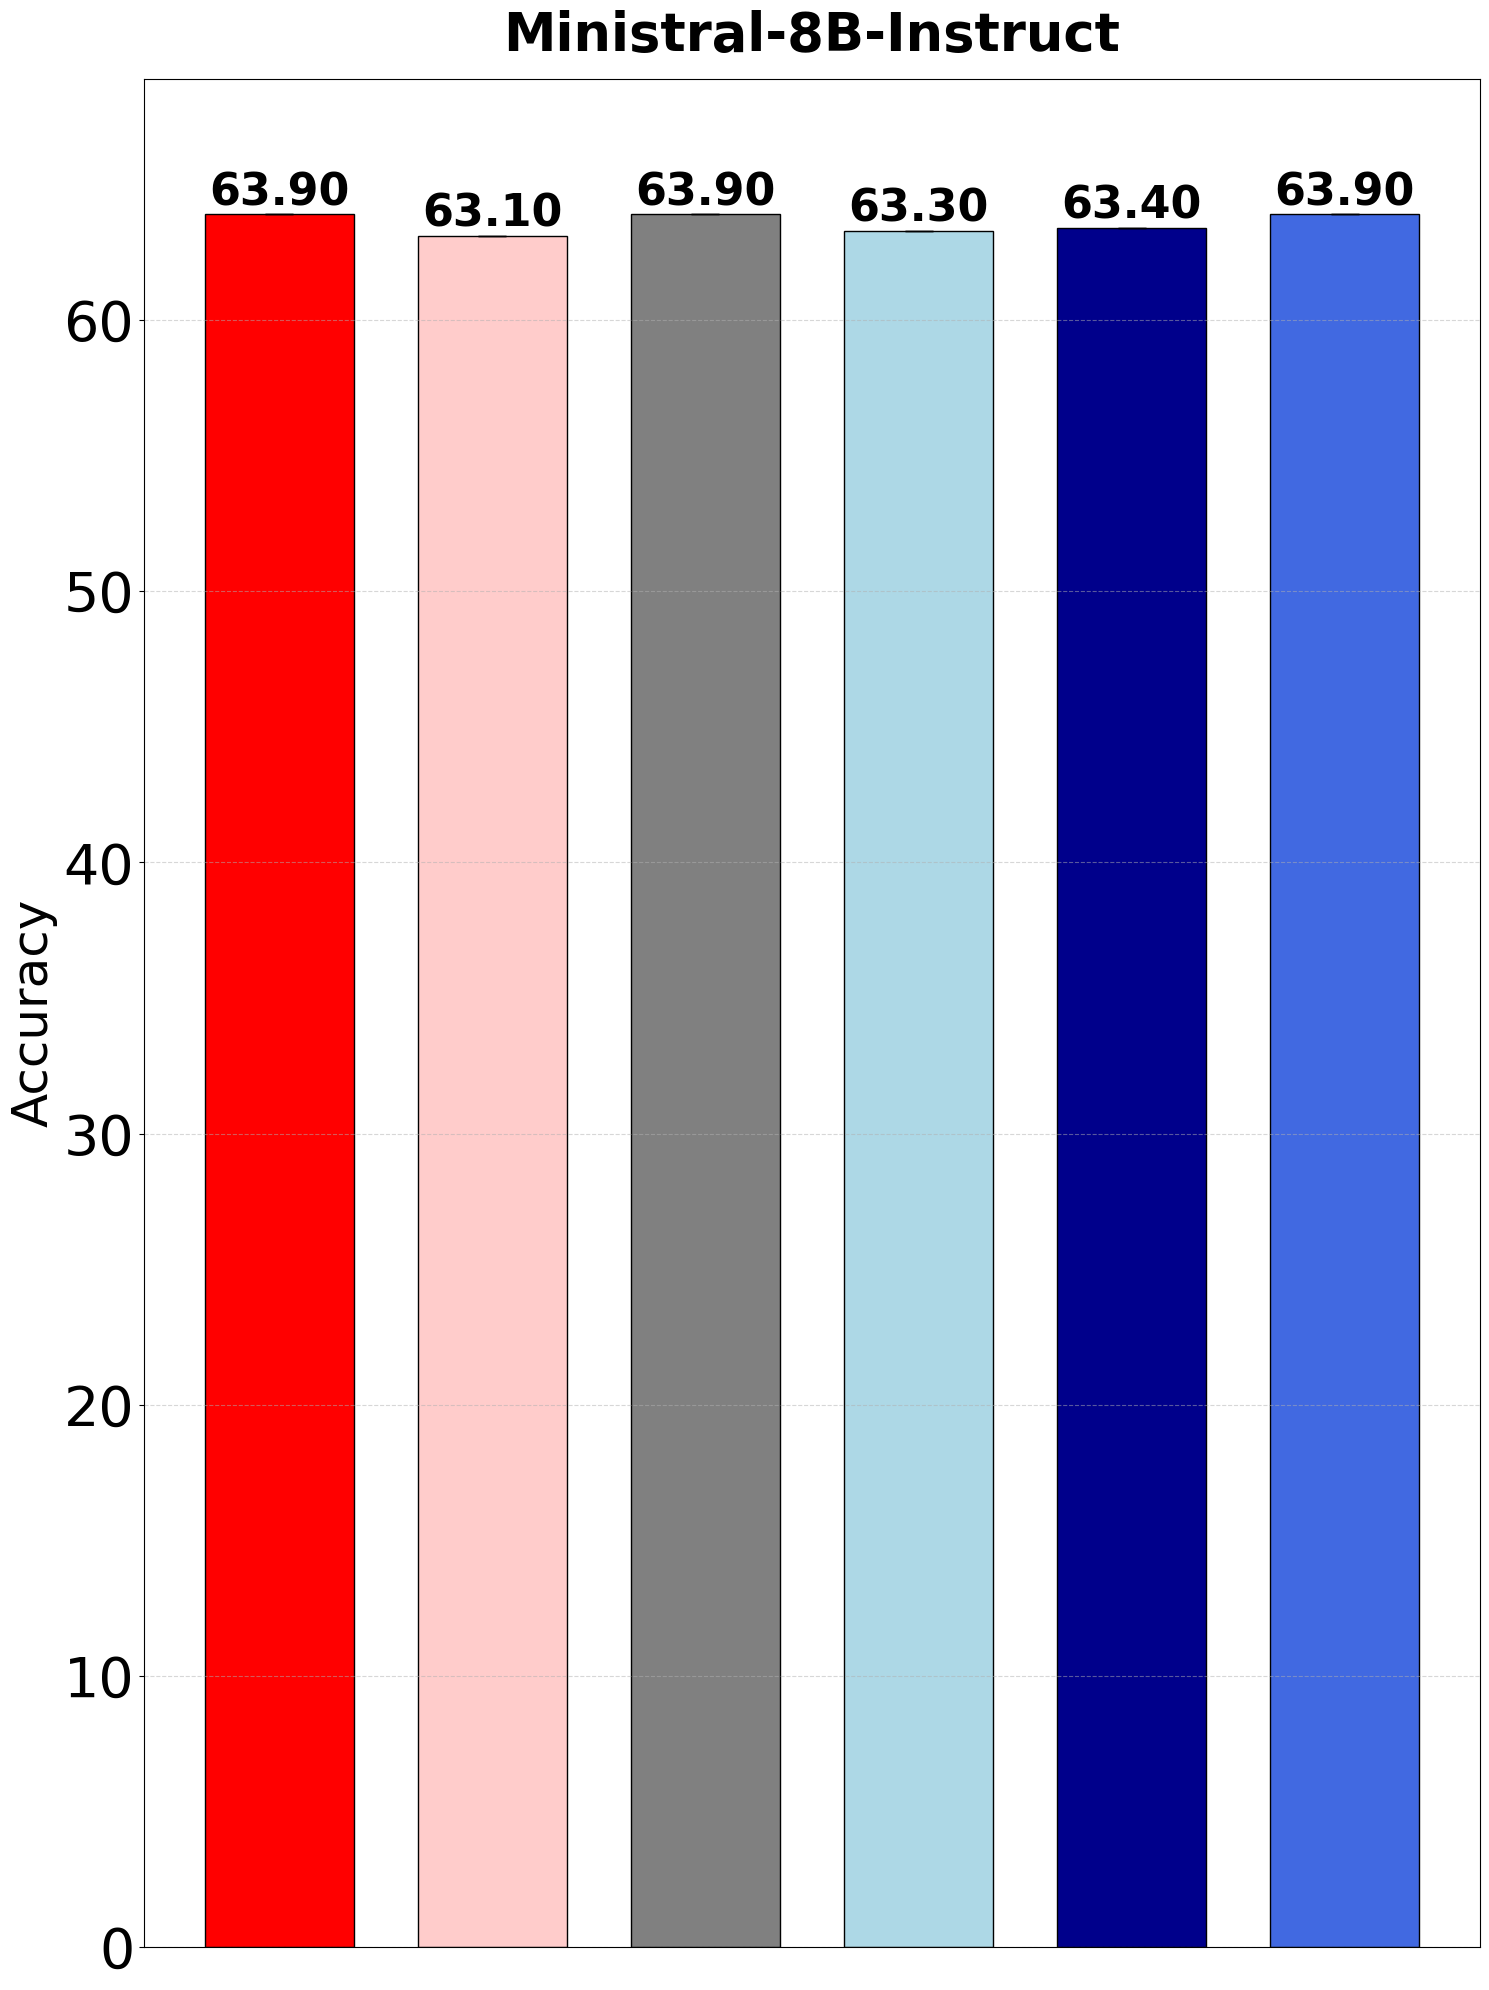

In [11]:
plot_mmlu_performance_from_df(df, title = df["model"][0], accuracy_column="capability", std_err_column="capability_stderr", savepath=f"/data/nathalie_maria_kirch/ERA_Fellowship/images/causal/{model_name}/{model_name}_{single}capability.pdf")

['mlp' 'linear' 'control' 'transformer'] ['offensive' nan 'defensive']


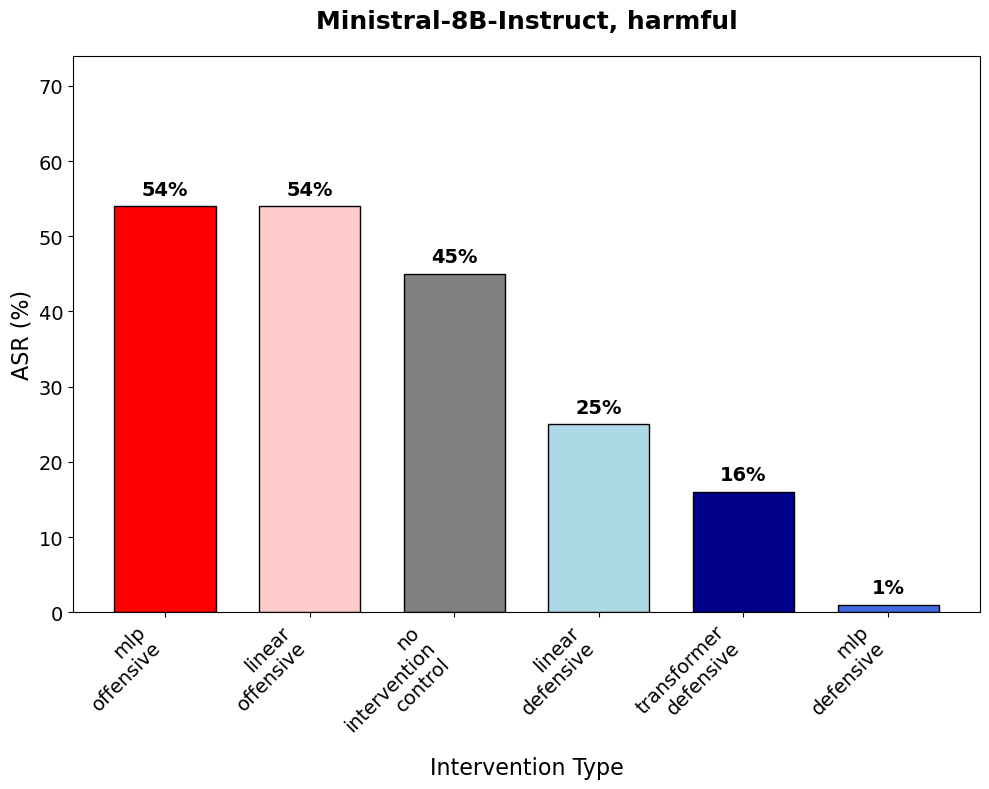

In [12]:
plot_asr(df, f"{model_name}, {request_type}", f"/data/nathalie_maria_kirch/ERA_Fellowship/images/causal/{model_name}/{model_name}_{request_type}_{single}.pdf")

In [ ]:
models = ["gemma-7b-it", "Llama-3.1-8B-Instruct", "Llama-3.2-3B-Instruct", "Ministral-8B-Instruct"]
dfs = []
for model_name in models:
        print(f"\nProcessing model: {model_name}")
        df = pd.read_csv(f"/data/nathalie_maria_kirch/ERA_Fellowship/datasets/{publication}/{model_name}/intervention/causal_intervention_parameters_with_capability_{single}.csv")
        
        # Convert is_best_config to string and clean it
        df['is_best_config'] = df['is_best_config'].astype(str)
        df = df[~df["is_best_config"].str.contains(r'\d', na=False)]
        
        # Handle the single/multilayer filtering
        if single == "single": 
            df = df[~df["probe_path"].str.contains("aggregated", na=True)]
        elif single == "multilayer":
            df = df[df["probe_path"].str.contains("aggregated", na=True)]

        # Properly convert is_best_config to boolean, handling NaN values
        df['is_best_config'] = df['is_best_config'].map({'True': True, 'False': False, 'nan': False})
        df['is_best_config'] = df['is_best_config'].fillna(False)
            
        df["probe_type_offensive_defensive"] = df["probe_type"] + "_" + df["offensive_defensive"]
        
        probe_combos = df["probe_type_offensive_defensive"].unique()
        probe_combos = [combo for combo in probe_combos if pd.notna(combo)]

        for probe_combo in probe_combos:
            probe_subset = df[df["probe_type_offensive_defensive"] == probe_combo]
            if not any(probe_subset["is_best_config"]):
                # Skip if subset is empty or all capability values are NaN
                if len(probe_subset) == 0 or probe_subset["capability"].isna().all():
                    continue
                
                # Get only rows with valid capability values
                valid_subset = probe_subset[probe_subset["capability"].notna()]
                if len(valid_subset) > 0:
                    max_capability_idx = valid_subset["capability"].idxmax()
                    df.loc[max_capability_idx, "is_best_config"] = True
        
        # Filter using boolean indexing after ensuring is_best_config is proper boolean
        df = df[df["is_best_config"] == True]
        df = df.sort_values(by="asr", ascending=False)
        dfs.append(df)



Processing model: gemma-7b-it

Processing model: Llama-3.1-8B-Instruct

Processing model: Llama-3.2-3B-Instruct

Processing model: Ministral-8B-Instruct


In [14]:
dfs[0]

,asr,model,probe_type,offensive_defensive,c_strength,lr,capability,probe_path,capability_stderr,target_value,is_best_config,probe_type_offensive_defensive
25,53,gemma-7b-it,mlp,offensive,40.00,0.010,0.506409,/data/nathalie_maria_kirch/ERA_Fellowship/data...,0.004031,0.506481,True,mlp_offensive
93,34,gemma-7b-it,linear,offensive,0.50,NaN,0.498932,/data/nathalie_maria_kirch/ERA_Fellowship/data...,0.004031,0.506481,True,linear_offensive
81,27,gemma-7b-it,transformer,offensive,20.00,0.050,0.497436,/data/nathalie_maria_kirch/ERA_Fellowship/data...,0.004046,0.506481,True,transformer_offensive
0,21,gemma-7b-it,control,NaN,NaN,NaN,0.506481,NaN,0.004030,0.506481,True,NaN
57,15,gemma-7b-it,transformer,defensive,10.00,0.050,0.500997,/data/nathalie_maria_kirch/ERA_Fellowship/data...,0.004030,0.506481,True,transformer_defensive
91,13,gemma-7b-it,linear,defensive,-0.25,NaN,0.505127,/data/nathalie_maria_kirch/ERA_Fellowship/data...,0.004030,0.506481,True,linear_defensive
19,0,gemma-7b-it,mlp,defensive,30.00,0.025,0.505555,/data/nathalie_maria_kirch/ERA_Fellowship/data...,0.004030,0.506481,True,mlp_defensive


In [15]:
df

,asr,model,probe_type,offensive_defensive,c_strength,lr,capability,probe_path,capability_stderr,target_value,is_best_config,probe_type_offensive_defensive
28,54,Ministral-8B-Instruct,mlp,offensive,15.0,0.025,0.639012,/data/nathalie_maria_kirch/ERA_Fellowship/data...,0.003830,0.63894,True,mlp_offensive
67,54,Ministral-8B-Instruct,linear,offensive,0.4,NaN,0.630537,/data/nathalie_maria_kirch/ERA_Fellowship/data...,0.003831,0.63894,True,linear_offensive
0,45,Ministral-8B-Instruct,control,NaN,NaN,NaN,0.638940,NaN,0.003831,0.63894,True,NaN
65,25,Ministral-8B-Instruct,linear,defensive,-0.4,NaN,0.632673,/data/nathalie_maria_kirch/ERA_Fellowship/data...,0.003824,0.63894,True,linear_defensive
61,16,Ministral-8B-Instruct,transformer,defensive,40.0,0.050,0.633813,/data/nathalie_maria_kirch/ERA_Fellowship/data...,0.003832,0.63894,True,transformer_defensive
19,1,Ministral-8B-Instruct,mlp,defensive,30.0,0.025,0.639225,/data/nathalie_maria_kirch/ERA_Fellowship/data...,0.003831,0.63894,True,mlp_defensive


In [16]:
finetuning_df  = pd.read_csv(f"/data/nathalie_maria_kirch/ERA_Fellowship/datasets/{publication}/finetuned_results.csv")
finetuning_df

,model,baseline_ASR,baseline_MMLU,finetuned_ASR,finetuned_MMLU,finetune_name,notes
0,Gemma 7B Instruct,23,50.6,17,50.35,baseline,NaN
1,Llama 3.1 8B Instruct,12,68.1,4,66.24,baseline,NaN
2,Llama 3.2 3B Instruct,15,60.5,9,59.09,assistantonly_again_ep5,NaN
3,Ministral 8B Instruct,49,63.9,11,62.51,baseline,NaN


In [ ]:
import pandas as pd
import numpy as np

# Standardize model names in both dataframes
def standardize_model_name(name):
    # Remove '-' and standardize spacing
    # also replace "Gemma" with "gemma"
    name = name.replace('Gemma 7B Instruct', 'gemma-7b-it')
    return name.replace(' ', '-')


# Apply standardization to finetuning_df
finetuning_df['model'] = finetuning_df['model'].apply(standardize_model_name)

for idx, df in enumerate(dfs):
    # Create a shorter version with selected columns
    short_finetune = finetuning_df[["model", "finetuned_ASR", "finetuned_MMLU"]]
    short_finetune["probe_type"] = "finetune"
    short_finetune["offensive_defensive"] = "none"
    short_finetune["probe_path"] = "none"
    short_finetune["is_best_config"] = True

    # Rename columns 
    # Note: You had the same column name twice in the rename dictionary, which would cause issues
    short_finetune.rename(columns={
    "finetuned_ASR": "asr",
    "finetuned_MMLU": "capability"
    }, inplace=True)


    short_finetune["capability_stderr"] = 0

    # Filter for rows with the same model name as in dfs[1]
    short_finetune = short_finetune[short_finetune["model"] == dfs[idx]["model"][0]]

    # Append as new row
    dfs[idx] = pd.concat([dfs[idx], short_finetune], ignore_index=True)

/tmp/ipykernel_2413703/192235725.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_finetune["probe_type"] = "finetune"
/tmp/ipykernel_2413703/192235725.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_finetune["offensive_defensive"] = "none"
/tmp/ipykernel_2413703/192235725.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

In [18]:
finetuning_df

,model,baseline_ASR,baseline_MMLU,finetuned_ASR,finetuned_MMLU,finetune_name,notes
0,gemma-7b-it,23,50.6,17,50.35,baseline,NaN
1,Llama-3.1-8B-Instruct,12,68.1,4,66.24,baseline,NaN
2,Llama-3.2-3B-Instruct,15,60.5,9,59.09,assistantonly_again_ep5,NaN
3,Ministral-8B-Instruct,49,63.9,11,62.51,baseline,NaN


In [19]:
dfs[1]

,asr,model,probe_type,offensive_defensive,c_strength,lr,capability,probe_path,capability_stderr,target_value,is_best_config,probe_type_offensive_defensive
0,39,Llama-3.1-8B-Instruct,mlp,offensive,40.00,0.010,0.680743,/data/nathalie_maria_kirch/ERA_Fellowship/data...,0.003752,0.68053,True,mlp_offensive
1,17,Llama-3.1-8B-Instruct,linear,offensive,0.25,NaN,0.680103,/data/nathalie_maria_kirch/ERA_Fellowship/data...,0.003756,0.68053,True,linear_offensive
2,16,Llama-3.1-8B-Instruct,transformer,offensive,15.00,0.050,0.674975,/data/nathalie_maria_kirch/ERA_Fellowship/data...,0.003765,0.68053,True,transformer_offensive
3,11,Llama-3.1-8B-Instruct,control,NaN,NaN,NaN,0.680530,NaN,0.003752,0.68053,True,NaN
4,11,Llama-3.1-8B-Instruct,linear,defensive,-0.25,NaN,0.673337,/data/nathalie_maria_kirch/ERA_Fellowship/data...,0.003761,0.68053,True,linear_defensive
5,9,Llama-3.1-8B-Instruct,transformer,defensive,10.00,0.050,0.674690,/data/nathalie_maria_kirch/ERA_Fellowship/data...,0.003763,0.68053,True,transformer_defensive
6,1,Llama-3.1-8B-Instruct,mlp,defensive,30.00,0.025,0.680387,/data/nathalie_maria_kirch/ERA_Fellowship/data...,0.003751,0.68053,True,mlp_defensive
7,4,Llama-3.1-8B-Instruct,finetune,none,NaN,NaN,66.240000,none,0.000000,NaN,True,NaN


['mlp' 'linear' 'transformer' 'control' 'finetune'] ['offensive' nan 'defensive' 'none']
['mlp' 'linear' 'transformer' 'control' 'finetune'] ['offensive' nan 'defensive' 'none']
['mlp' 'transformer' 'linear' 'control' 'finetune'] ['offensive' nan 'defensive' 'none']
['mlp' 'linear' 'control' 'transformer' 'finetune'] ['offensive' nan 'defensive' 'none']
['linear\noffensive', 'mlp\noffensive', 'transformer\noffensive', 'no\nintervention\ncontrol', 'finetune\nnone', 'linear\ndefensive', 'mlp\ndefensive', 'transformer\ndefensive']


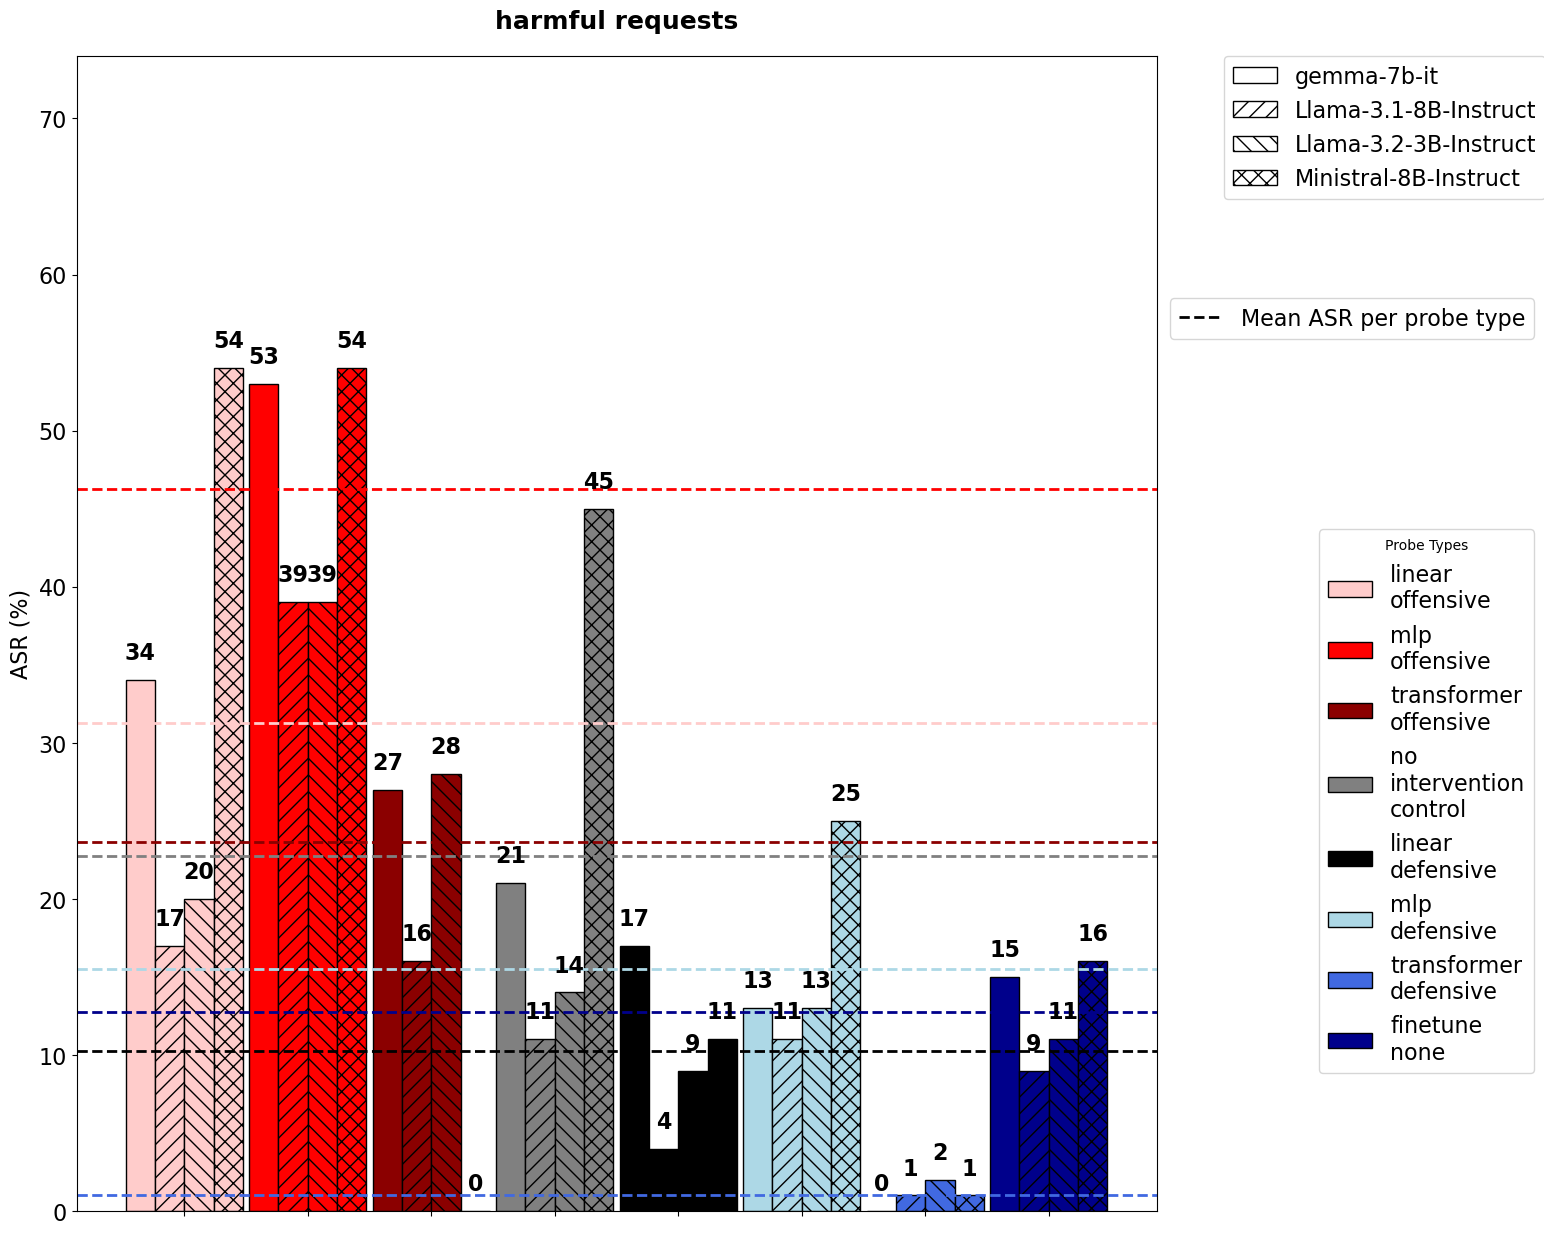

In [20]:
def plot_multi_model_asr(dfs, model_names, title, color_dict, savepath=None):
    import matplotlib.pyplot as plt
    import numpy as np
    import os
    import pandas as pd
    
    assert len(dfs) == len(model_names)
    
    processed_dfs = []
    all_probe_types = set()
    
    for df in dfs:
        df = df.copy()
        # df["joint_probe_type"] = df["probe_type"] + "\n" + df["offensive_defensive"]
        # df["joint_probe_type"] = df["joint_probe_type"].str.replace("nan", "")
        # df["joint_probe_type"] = df["joint_probe_type"].replace("control\nnone", "no\nintervention\ncontrol")

        print(df["probe_type"].unique(), df["offensive_defensive"].unique())

        # First handle the control case before concatenation
        df["offensive_defensive"] = df["offensive_defensive"].fillna("")
        df["joint_probe_type"] = df.apply(
            lambda row: "no\nintervention\ncontrol" if row["probe_type"] == "control" 
            else row["probe_type"] + "\n" + row["offensive_defensive"],
            axis=1
        )
        
        # make sure that "asr" column is int
        df["joint_probe_type"] = df["joint_probe_type"].astype(str)
        all_probe_types.update(df["joint_probe_type"].unique())
        processed_dfs.append(df)
    
    probe_types = list(all_probe_types)
    
    
    
    def sort_key(probe_type):
        # Convert to string and handle None/NaN cases
        probe_type_str = str(probe_type) if probe_type is not None and not pd.isna(probe_type) else ""
        
        if "offensive" in probe_type_str.lower():
            return (0, probe_type_str)
        elif "control" in probe_type_str.lower():
            return (1, probe_type_str)
        else:
            return (2, probe_type_str)
    
    probe_types.sort(key=sort_key)
    
    n_probe_types = len(probe_types)
    n_models = len(processed_dfs)
    
    fig, ax = plt.subplots(figsize=(16, 15))
    
    bar_width = 0.95 / n_models
    index = np.arange(n_probe_types)
    
    # Calculate means for each probe type
    means = {}
    for probe_type in probe_types:
        asrs = []
        for df in processed_dfs:
            probe_data = df[df["joint_probe_type"] == probe_type]
            if len(probe_data) > 0:
                asrs.append(probe_data['asr'].iloc[0])
        means[probe_type] = np.mean(asrs) if asrs else 0
    
    
    bars_list = []
    for i, (df, model_name) in enumerate(zip(processed_dfs, model_names)):
        positions = index + (i - n_models/2 + 0.5) * bar_width
        
        complete_data = []
        for probe_type in probe_types:
            probe_data = df[df["joint_probe_type"] == probe_type]
            if len(probe_data) > 0:
                complete_data.append({
                    'joint_probe_type': probe_type,
                    'asr': probe_data['asr'].iloc[0],
                    'mean_error': probe_data['mean_error'].iloc[0] if 'mean_error' in probe_data.columns else None
                })
            else:
                complete_data.append({
                    'joint_probe_type': probe_type,
                    'asr': 0,
                    'mean_error': None
                })
        
        complete_df = pd.DataFrame(complete_data)
        colors = [color_dict.get(label, "#808080") for label in complete_df["joint_probe_type"]]
        
        hatch_patterns = ['', '//', '\\\\', 'xx', '++', '||', '--', 'oo', '..']
        model_hatch = hatch_patterns[i % len(hatch_patterns)]
        
        bars = ax.bar(positions, complete_df['asr'], width=bar_width, label=model_name,
                     color=colors, edgecolor="black", capsize=8, hatch=model_hatch)
        bars_list.append(bars)
        
        for j, bar in enumerate(bars):
            asr = complete_df["asr"].iloc[j]
            if complete_df["mean_error"].iloc[j] is not None:
                error = complete_df["mean_error"].iloc[j]
                text = f'{int(asr)}\n±{error:.2f}'
            else:
                text = f'{int(asr)}'
            
            ax.text(bar.get_x() + bar.get_width()/2, asr + 1,
                   text, ha='center', va='bottom', fontsize=16,
                   color='black', fontweight='bold')
    
# Add mean lines and confidence intervals for each probe type
    for idx, probe_type in enumerate(probe_types):
        mean_val = means[probe_type]
        
        # Plot mean line across entire plot width
        ax.axhline(y=mean_val, 
                  color=color_dict.get(probe_type, "#808080"),
                  linestyle='--', linewidth=2,
                  label=f'Mean {probe_type}')
        

    print(probe_types)    
    ax.set_ylabel("ASR (%)", fontsize=16)
    ax.set_title(title, fontsize=18, weight='bold', pad=20)
    
    ax.set_xticks(index)
    ax.set_xticklabels([], rotation=45, ha='right', fontsize=16)
    
    ax.tick_params(axis='y', labelsize=16)
    max_asr = max(max(df['asr']) for df in processed_dfs)
    ax.set_ylim(0, max_asr + 20)
    
    
    probe_handles = [plt.Rectangle((0,0),1,1, facecolor=color_dict[probe_type], edgecolor='black') 
                    for probe_type in probe_types]
    mean_handle = [plt.Line2D([0], [0], linestyle='--', color='black', linewidth=2)]
    probe_labels = list(color_dict.keys())
    mean_label = ['Mean ASR per probe type']
    
    model_handles, model_labels = ax.get_legend_handles_labels()
    
    # Filter out mean line labels from model legend
    model_handles = model_handles[:len(model_names)]
    model_labels = model_labels[:len(model_names)]
    
    custom_model_handles = []
    for i, label in enumerate(model_labels):
        hatch_pattern = hatch_patterns[i % len(hatch_patterns)]
        patch = plt.Rectangle((0, 0), 1, 1, facecolor='white', edgecolor='black', hatch=hatch_pattern)
        custom_model_handles.append(patch)
    
    
    first_legend = ax.legend(custom_model_handles, model_names,
      fontsize=16,
      bbox_to_anchor=(1.36, 1),  # Moved slightly right
      loc='upper right',
      ncol=1, 
      borderaxespad=0.)
    ax.add_artist(first_legend)

    second_legend = ax.legend(mean_handle, mean_label,
        bbox_to_anchor=(1.36, 0.8),
        loc='upper right',
        fontsize=16)
    ax.add_artist(second_legend)

    ax.legend(probe_handles, probe_labels,
        title='Probe Types',
        fontsize=16,
        bbox_to_anchor=(1.36, 0.6),
        loc='upper right',
        ncol=1)

    plt.subplots_adjust(right=0.8)  # Increased space on right
    
    # create parent directory if it doesn't exist
    os.makedirs(os.path.dirname(savepath), exist_ok=True)
    plt.savefig(savepath, bbox_inches='tight', format='pdf')
    
    
    plt.show()

plot_multi_model_asr(dfs, models, f"harmful requests", color_dict, savepath=f"/data/nathalie_maria_kirch/ERA_Fellowship/images/{publication}/causal/causal_comparison_{single}.pdf")

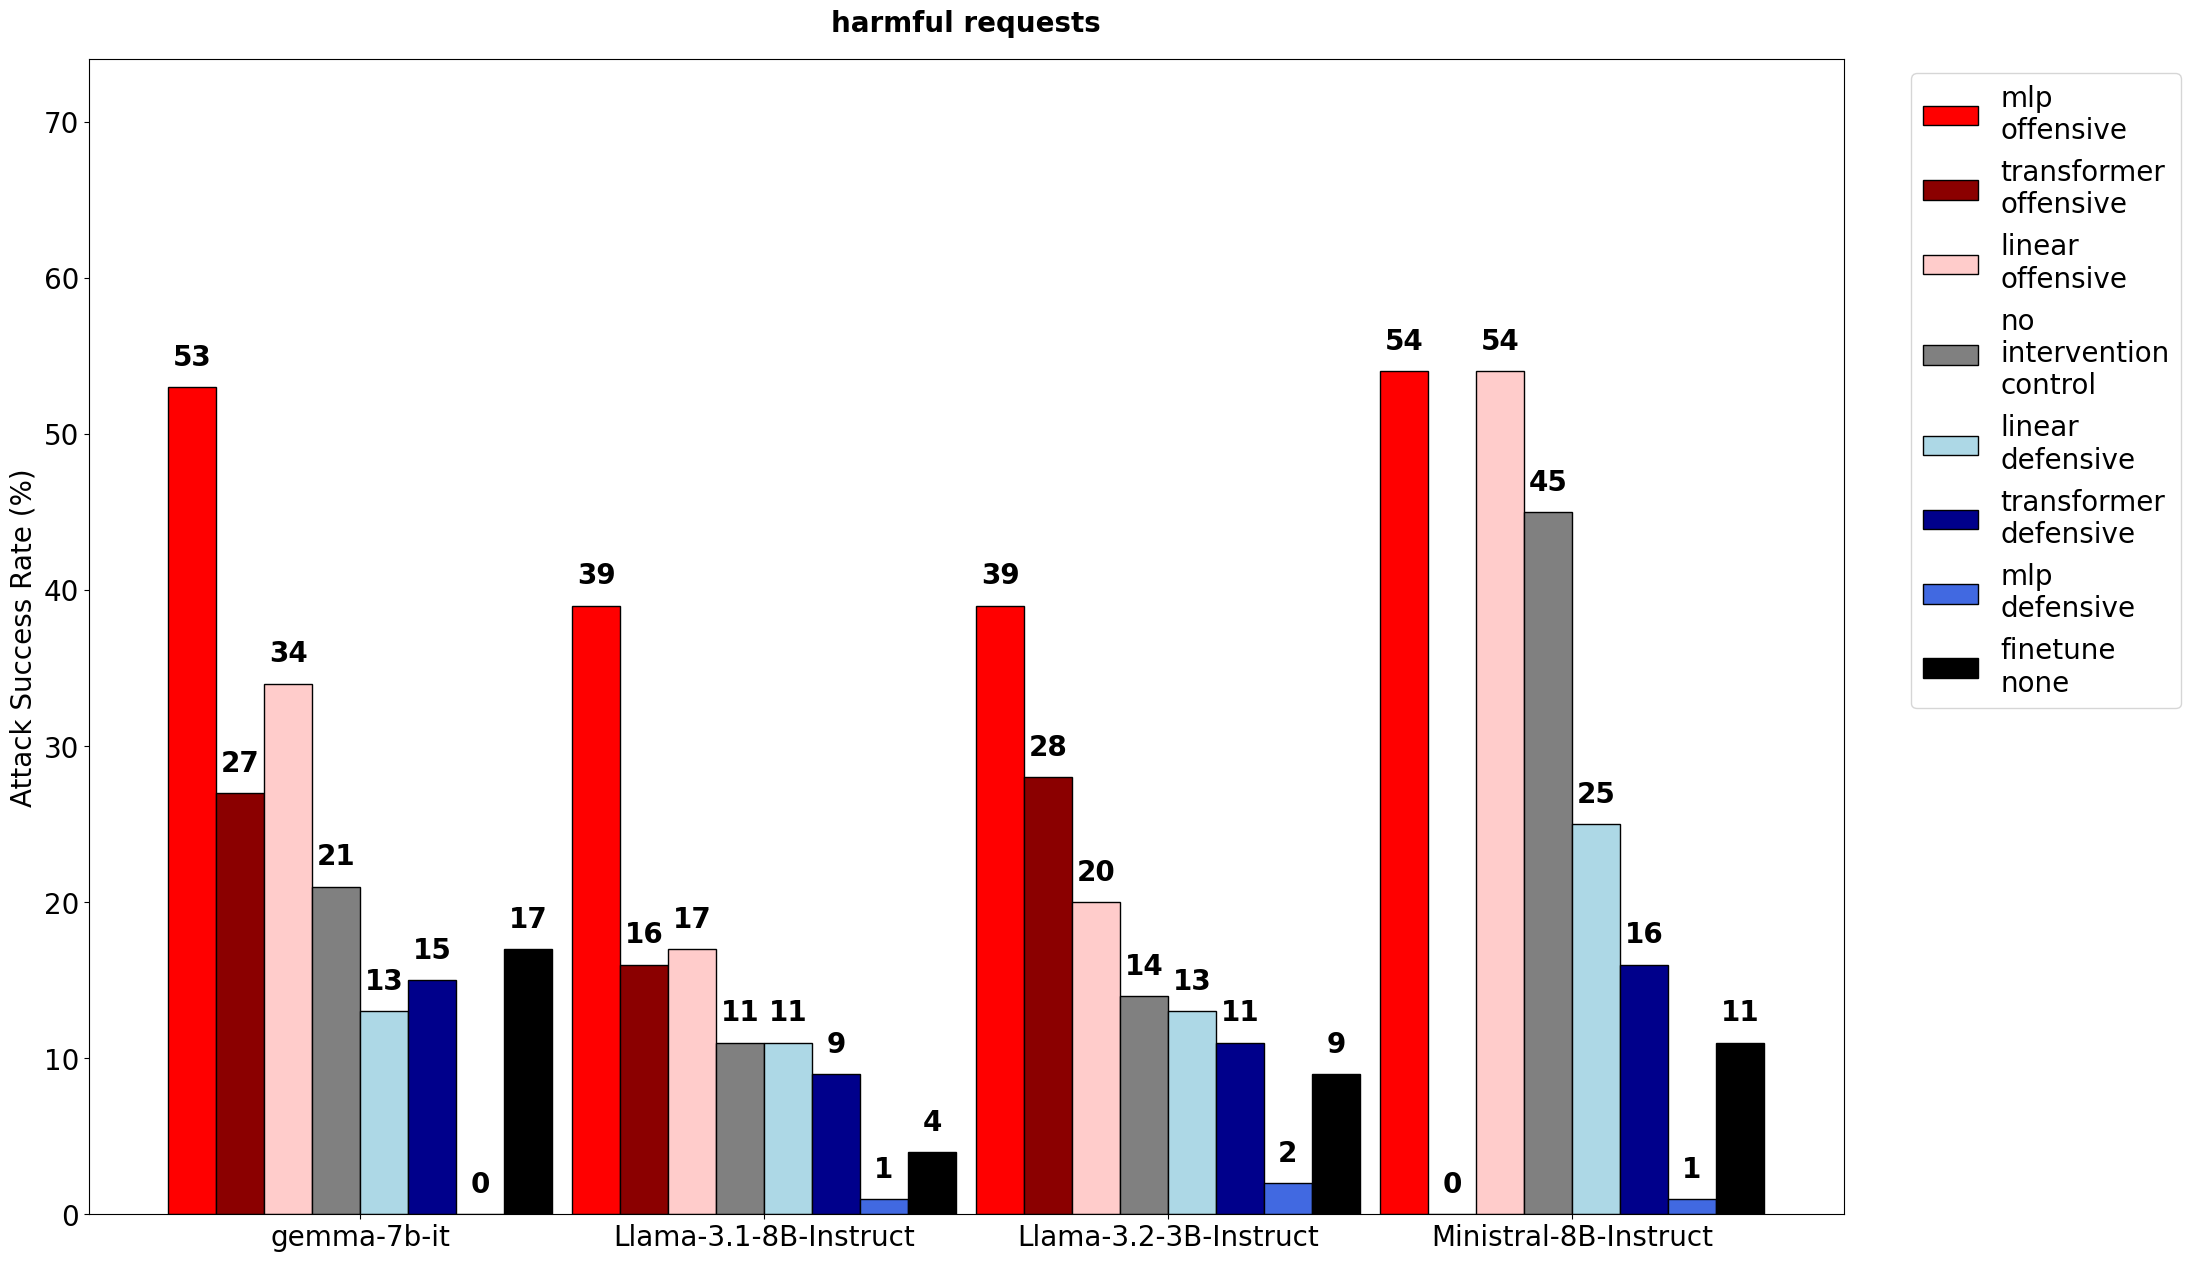

In [ ]:
from matplotlib.patches import Patch

from matplotlib.patches import Patch

from matplotlib.patches import Patch
from matplotlib.patches import Patch

def plot_multi_model_asr(dfs, model_names, title, color_dict, savepath=None):
    import matplotlib.pyplot as plt
    import numpy as np
    
    assert len(dfs) == len(model_names)
    color_dict = {
        'linear\noffensive': "#ffcccb",  # Lightest red
        'mlp\noffensive': "#ff0000",     # Medium red
        'transformer\noffensive': "#8B0000",  # Darkest red
        'no\nintervention\ncontrol': "#808080",  # Gray
        'linear\ndefensive': "#ADD8E6",  # Lightest blue
        'mlp\ndefensive': "#4169E1",     # Medium blue
        'transformer\ndefensive': "#00008B",
        "finetune\nnone": "#000000"
    }
    
    processed_dfs = []
    all_probe_types = set()
    
    # Process dataframes and collect probe types
    for df in dfs:
        df = df.copy()
        # df["joint_probe_type"] = df["probe_type"] + "\n" + df["offensive_defensive"]
        # df["joint_probe_type"] = df["joint_probe_type"].str.replace("nan", "")
        # df["joint_probe_type"] = df["joint_probe_type"].replace("control\nnone", "no\nintervention\ncontrol")
        df["offensive_defensive"] = df["offensive_defensive"].fillna("")
        df["joint_probe_type"] = df.apply(
            lambda row: "no\nintervention\ncontrol" if row["probe_type"] == "control" 
            else row["probe_type"] + "\n" + row["offensive_defensive"],
            axis=1
        )
        
        # make sure that "asr" column is int
        df["joint_probe_type"] = df["joint_probe_type"].astype(str)
        all_probe_types.update(df["joint_probe_type"].unique())
        all_probe_types.update(df["joint_probe_type"].unique())
        processed_dfs.append(df)
    
    # Get probe types and sort them based on average ASR across all models
    probe_types = list(all_probe_types)
    
  
    n_probe_types = len(probe_types)
    n_models = len(processed_dfs)
    
    # Increase figure width further to accommodate legends
    fig, ax = plt.subplots(figsize=(26, 15))
    
    bar_width = 0.95 / n_probe_types
    index = np.arange(n_models)
    
    bars_list = []
    
    # Plot bars for each model
    for j, model_name in enumerate(model_names):
        # sorted_probe_types = list(model_probe_asrs[model_name].keys())
        sorted_probe_types = ['mlp\noffensive', 'transformer\noffensive', 'linear\noffensive', 'no\nintervention\ncontrol', 'linear\ndefensive', 'transformer\ndefensive', 'mlp\ndefensive', "finetune\nnone"]

        
        # Plot bars for each probe type in sorted order
        for i, probe_type in enumerate(sorted_probe_types):
            position = index[j] + (i - n_probe_types / 2 + 0.5) * bar_width
            
            df = processed_dfs[j]
            probe_data = df[df["joint_probe_type"] == probe_type]
            
            if len(probe_data) > 0:
                asr = probe_data['asr'].iloc[0]
                error = probe_data['mean_error'].iloc[0] if 'mean_error' in probe_data.columns else None
            else:
                asr = 0
                error = None
            
            bar = ax.bar(
                position,
                asr,
                width=bar_width,
                color=color_dict.get(probe_type, "#808080"),
                edgecolor="black",
                label=probe_type if j == 0 else None,
                capsize=8
            )
            bars_list.append(bar)
            
            if error is not None:
                text = f'{int(asr)}\n±{error:.2f}'
            else:
                text = f'{int(asr)}'
            ax.text(
                position, asr + 1, text,
                ha='center', va='bottom', fontsize= 20, color='black', fontweight='bold')
    
    # Configure axis
    ax.set_ylabel("Attack Success Rate (%)", fontsize=20)
    ax.set_title(title, fontsize=20, weight='bold', pad=20)
    ax.set_xticks(index)
    ax.set_xticklabels(model_names, ha='center', fontsize=20)
    ax.tick_params(axis='y', labelsize=20)
    max_asr = max(max(df['asr']) for df in processed_dfs)
    ax.set_ylim(0, max_asr + 20)
    
    # First legend: Probe Types with larger box and better spacing
    probe_handles = [
        plt.Rectangle((0, 0), 1, 1, facecolor=color_dict[probe_type], edgecolor='black') 
        for probe_type in sorted_probe_types
    ]
    
    ax.legend(probe_handles, sorted_probe_types,
        fontsize=20,
        bbox_to_anchor=(1.2, 1),
        loc='upper right',
        ncol=1)

    plt.subplots_adjust(right=0.8)  # Increased space on right
    

    
    # Adjust layout with more space for legends
    plt.subplots_adjust(right=0.8)
    
    if savepath:
        plt.savefig(savepath, bbox_inches='tight', format='pdf')
    
    plt.show()

plot_multi_model_asr(dfs, models, f"harmful requests", color_dict, savepath=f"/data/nathalie_maria_kirch/ERA_Fellowship/images/{publication}/causal/causal_comparison_{single}.pdf")


KeyError: 'no\nintervention\ncontrol'

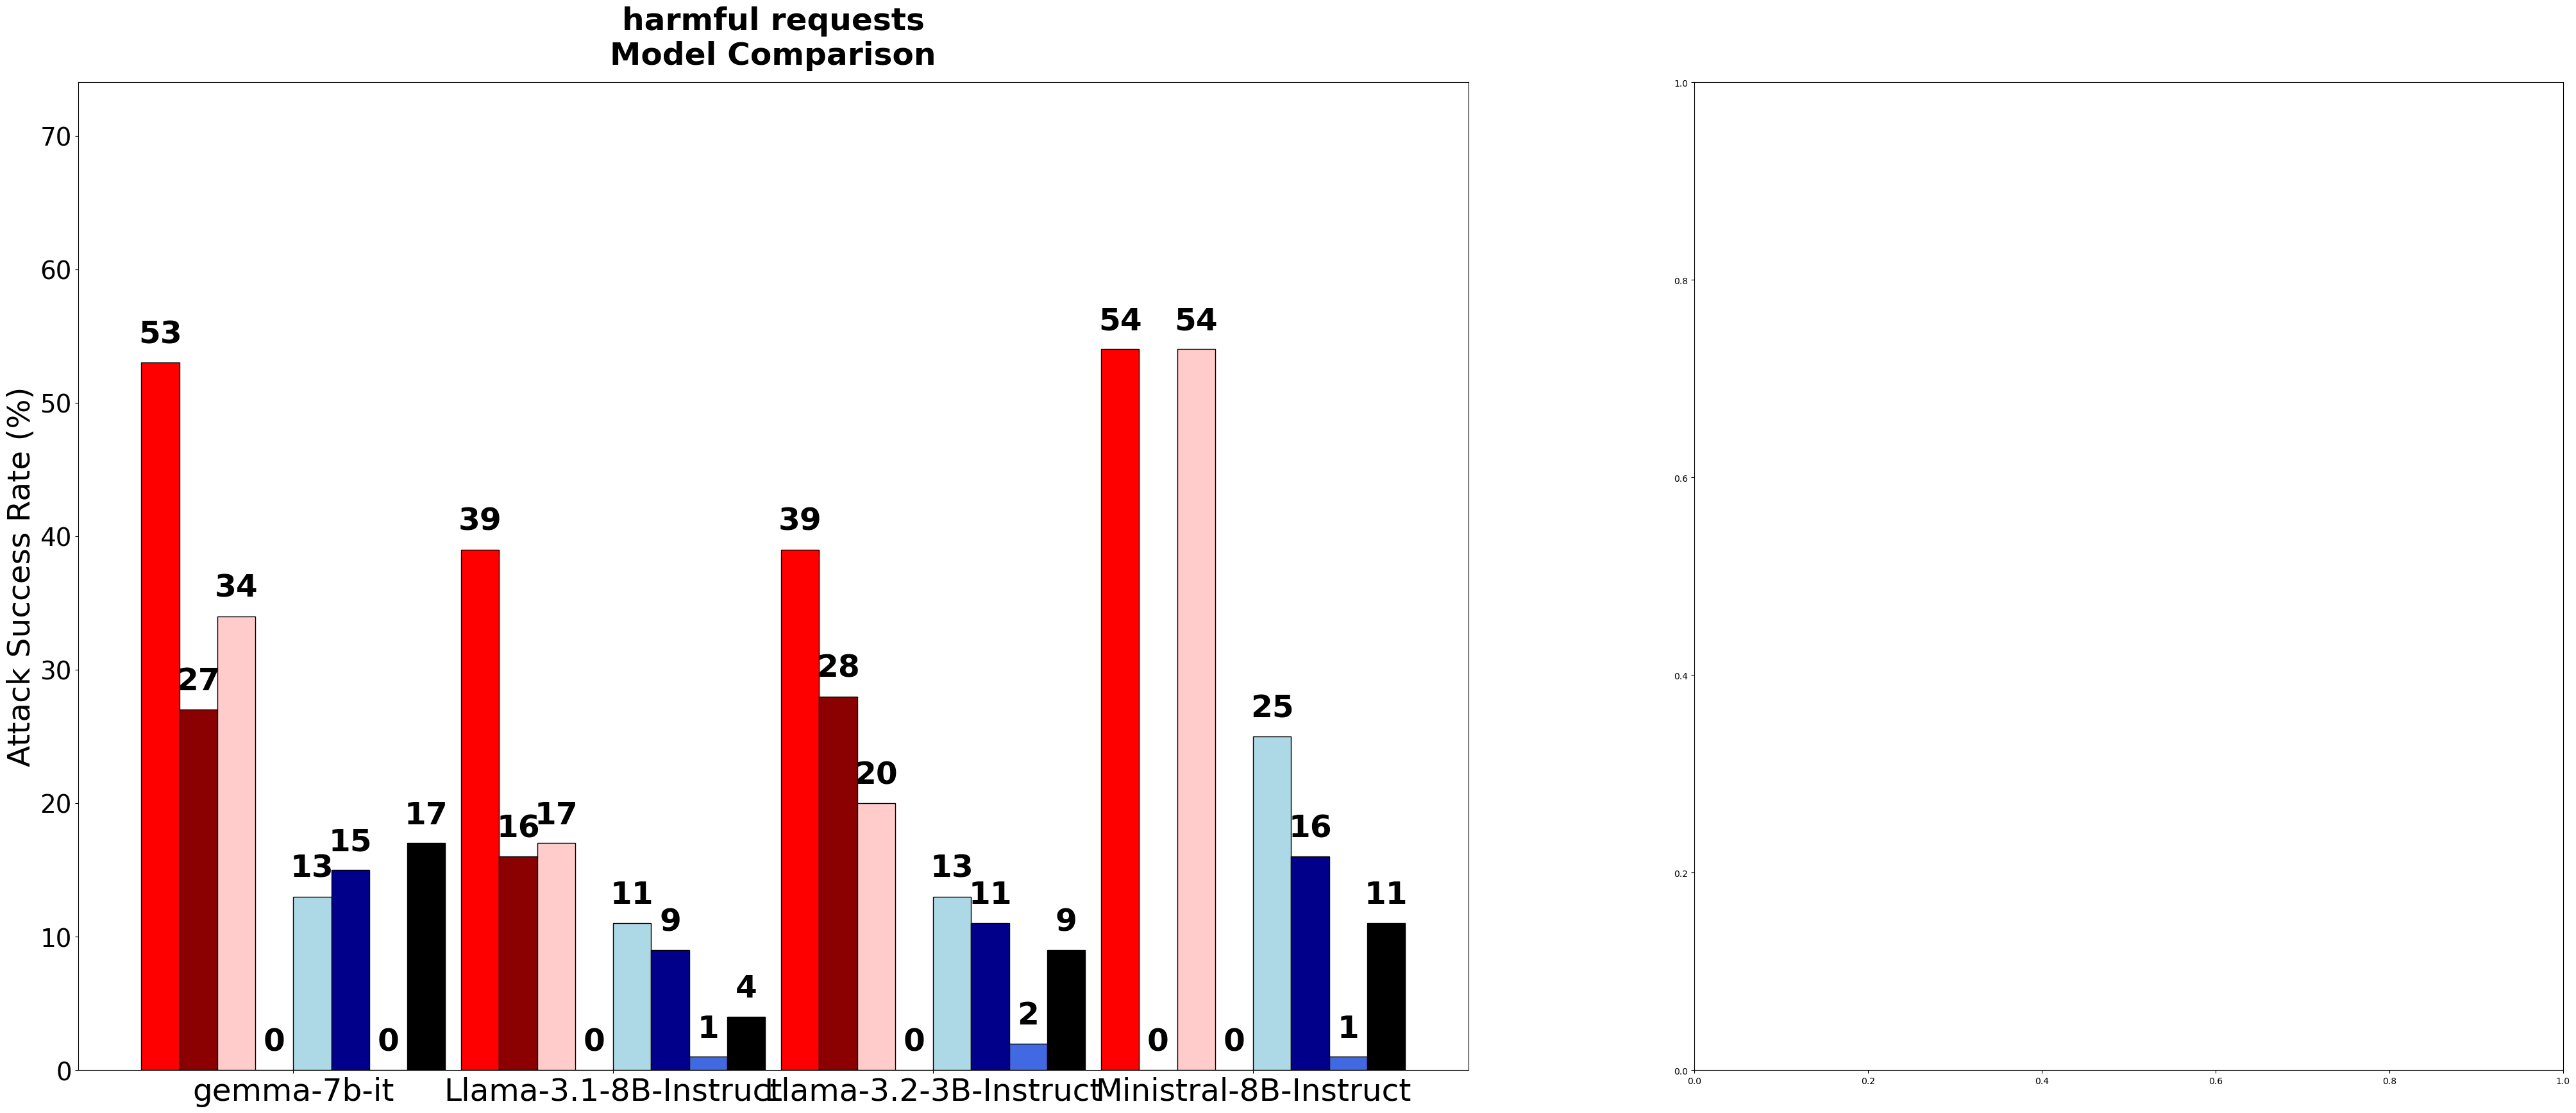

In [22]:
def plot_multi_model_asr_with_mean(dfs, model_names, title, savepath=None):
    """
    Creates two plots side by side:
    1. Original multi-model ASR plot
    2. Mean ASR per probe type across all models
    """
    import matplotlib.pyplot as plt
    import numpy as np
    
    # Color dictionary for consistent styling
    color_dict = {
        'linear\noffensive': "#ffcccb",  # Lightest red
        'mlp\noffensive': "#ff0000",     # Medium red
        'transformer\noffensive': "#8B0000",  # Darkest red
        'no\nintervention\ncontrol': "#808080",  # Gray
        'linear\ndefensive': "#ADD8E6",  # Lightest blue
        'mlp\ndefensive': "#4169E1",     # Medium blue
        'transformer\ndefensive': "#00008B",  # Darkest blue
        "finetune\nnone": "#000000"
    }
    
    # Create figure with side-by-side subplots of different sizes
    # Adjusted figure size for horizontal layout
    fig = plt.figure(figsize=(50, 20))
    
    # Create a GridSpec layout to control subplot sizes
    gs = plt.GridSpec(1, 2, width_ratios=[1.6, 1])  # First plot 60% wider than second
    
    # Create two horizontally arranged subplots with different widths
    ax1 = plt.subplot(gs[0])  # Left subplot (wider)
    ax2 = plt.subplot(gs[1])  # Right subplot (narrower)
    
    # Process dataframes
    processed_dfs = []
    all_probe_types = set()
    
    for df in dfs:
        df = df.copy()
        if not 'joint_probe_type' in df.columns:
            df["joint_probe_type"] = df["probe_type"] + "\n" + df["offensive_defensive"]
            df["joint_probe_type"] = df["joint_probe_type"].str.replace("nan", "")
        
        df["joint_probe_type"] = df["joint_probe_type"].replace("control_control", "control")
        df["joint_probe_type"] = df["joint_probe_type"].replace("control", "no\nintervention\ncontrol")
        df["joint_probe_type"] = df["joint_probe_type"].str.replace("_", "\n")
        all_probe_types.update(df["joint_probe_type"].unique())
        processed_dfs.append(df)
    
    sorted_probe_types = ['mlp\noffensive', 'transformer\noffensive', 'linear\noffensive', 
                         'no\nintervention\ncontrol', 'linear\ndefensive', 
                         'transformer\ndefensive', 'mlp\ndefensive', "finetune\nnone"]
    
    # Plot 1: Original multi-model ASR plot
    n_probe_types = len(sorted_probe_types)
    n_models = len(processed_dfs)
    bar_width = 0.95 / n_probe_types
    index = np.arange(n_models)
    
    for j, model_name in enumerate(model_names):
        for i, probe_type in enumerate(sorted_probe_types):
            position = index[j] + (i - n_probe_types / 2 + 0.5) * bar_width
            
            df = processed_dfs[j]
            probe_data = df[df["joint_probe_type"] == probe_type]
            
            if len(probe_data) > 0:
                asr = probe_data['asr'].iloc[0]
                error = probe_data['mean_error'].iloc[0] if 'mean_error' in probe_data.columns else None
            else:
                asr = 0
                error = None
            
            bar = ax1.bar(
                position,
                asr,
                width=bar_width,
                color=color_dict.get(probe_type, "#808080"),
                edgecolor="black",
                label=probe_type if j == 0 else None,
                capsize=8
            )
            
            if error is not None:
                text = f'{int(asr)}\n±{error:.2f}'
            else:
                text = f'{int(asr)}'
            ax1.text(
                position, asr + 1, text,
                ha='center', va='bottom', fontsize=35, color='black', fontweight='bold')
    
    # Configure first plot
    ax1.set_ylabel("Attack Success Rate (%)", fontsize=35)
    ax1.set_title(f"{title}\nModel Comparison", fontsize=35, weight='bold', pad=20)
    ax1.set_xticks(index)
    ax1.set_xticklabels(model_names, ha='center', fontsize=35)
    ax1.tick_params(axis='y', labelsize=28)
    max_asr = max(max(df['asr']) for df in processed_dfs)
    ax1.set_ylim(0, max_asr + 20)
    
    # Plot 2: Mean ASR per probe type
    mean_asrs = {}
    std_errors = {}
    
    # Calculate mean ASR and standard error for each probe type
    for probe_type in sorted_probe_types:
        asrs = []
        for df in processed_dfs:
            probe_data = df[df["joint_probe_type"] == probe_type]
            if len(probe_data) > 0:
                asrs.append(probe_data['asr'].iloc[0])
        
        if asrs:
            mean_asrs[probe_type] = np.mean(asrs)
            std_errors[probe_type] = np.std(asrs) / np.sqrt(len(asrs))
    
    # Plot mean ASRs
    positions = np.arange(len(sorted_probe_types))
    bars = ax2.bar(
        positions,
        [mean_asrs[pt] for pt in sorted_probe_types],
        color=[color_dict[pt] for pt in sorted_probe_types],
        edgecolor="black",
        capsize=8,
        # yerr=[std_errors[pt] for pt in sorted_probe_types]
    )
    
    # Add value labels on the bars
    for i, v in enumerate([mean_asrs[pt] for pt in sorted_probe_types]):
        ax2.text(i, v + 1, f'{v:.1f}\n±{std_errors[sorted_probe_types[i]]:.1f}',
                ha='center', va='bottom', fontsize=35, color='black', fontweight='bold')
    
    # Configure second plot
    ax2.set_ylabel("Mean Attack Success Rate (%)", fontsize=35)
    ax2.set_title(f"{title}\nMean ASR per Probe Type", fontsize=35, weight='bold', pad=20)
    ax2.set_xticks(positions)
    ax2.set_xticklabels([], ha='center', fontsize=35, rotation=45)  # Added rotation for better readability
    ax2.tick_params(axis='y', labelsize=28)
    ax2.set_ylim(0, max(mean_asrs.values()) + 20)
    
    # Add legends
    probe_handles = [
        plt.Rectangle((0, 0), 1, 1, facecolor=color_dict[probe_type], edgecolor='black') 
        for probe_type in sorted_probe_types
    ]
    
    # Add legend to first plot with increased font size
    ax1.legend(probe_handles, sorted_probe_types,
              fontsize=35,
              bbox_to_anchor=(1.05, 1),
              loc='upper left',
              ncol=1)
    
    # Adjust layout for better spacing
    plt.tight_layout(w_pad=8.0)  # Increased spacing between subplots
    
    if savepath:
        # Modify savepath to save both plots
        base_path = savepath.rsplit('.', 1)[0]
        plt.savefig(f"{base_path}_side_by_side.pdf", bbox_inches='tight', format='pdf', dpi=300)
    
    plt.show()

# Usage remains the same:
plot_multi_model_asr_with_mean(dfs, models, "harmful requests")

In [17]:
# /data/nathalie_maria_kirch/ERA_Fellowship/datasets/Llama-3.2-3B-Instruct/_meta-llamaLlama-3.2-3B-Instruct_prompt_res_activations_3011202404_14_34_rated.pkl_tensors.pt

In [18]:
import pickle
file_path = "/data/nathalie_maria_kirch/ERA_Fellowship/datasets/Llama-3.2-3B-Instruct/_meta-llamaLlama-3.2-3B-Instruct_prompt_res_activations_3011202404_14_34_rated.pkl_tensors.pt"
try:
    with open(file_path, 'rb') as f:
        data = pickle.load(f)
    print("Successfully loaded with pickle")
    print(type(data))
except Exception as e:
    print(f"Pickle loading failed: {e}")

Pickle loading failed: A load persistent id instruction was encountered, but no persistent_load function was specified.
